In [1]:
#1.FlowChart
def Print_values(a, b, c):
    if a > b:
        if b > c:
            lst = [a, b, c]
            x, y, z = lst
            result = x + y - 10 * z
            print(result)
        else:
            if a > c:
                lst = [a, c, b]
                x, y, z = lst
                result = x + y - 10 * z
                print(result)
            else:
                lst = [c, a, b]
                x, y, z = lst
                result = x + y - 10 * z
                print(result)
    else:
        if b > c:
           print("无结果（流程图没有画结果）")
        else:
            lst = [c, b, a]
            x, y, z = lst
            result = x + y - 10 * z
            print(result)
Print_values(5, 15, 10)

无结果（流程图没有画结果）


In [3]:
#2.Continuous celing function
import math
def F(x):
    if x == 1:
        return 1
    else:
        ceil_result = math.ceil(x / 3)
        return F(ceil_result) + 2 * x
user_input = input("请输入一个正整数列表（用逗号（英文）分隔，例如：1,4,7,10）：")
num_list = []
str_list = user_input.split(',')
for s in str_list:
    num = int(s)
    num_list.append(num)
print("计算结果是：")
for num in num_list:
    result =F(num)
    print(f"F({num}) = {result}")

请输入一个正整数列表（用逗号（英文）分隔，例如：1,4,7,10）： 1,2,3,4


计算结果是：
F(1) = 1
F(2) = 5
F(3) = 7
F(4) = 13


In [4]:
#3.Dice rolling
#3.1
def count_ways(x):
    if x < 10 or x > 60:
        return 0  
    count = [0]
    
    def recursive(numDice, totalPoint):
        if numDice == 10:
            if totalPoint == x:
                count[0] += 1
            return
        for point in range(1, 7):
            recursive(numDice + 1, totalPoint + point)
    recursive(0, 0)
    return count[0]

print(count_ways(59))

#3.2
def find_most_common_sum():
    Number_of_ways = []
    # 遍历所有可能的和（10到60），计算方式数并存储
    for x in range(10, 61):
        Number_of_ways.append((x, count_ways(x)))  # 存储元组 (和, 方式数)
    
    # 初始化最大方式数和对应的和
    max_ways = -1
    most_common_sum = 10
    # 遍历列表找出方式数最多的和
    for s, ways in Number_of_ways:
        if ways > max_ways:
            max_ways = ways
            most_common_sum = s
    return most_common_sum, max_ways
most_sum, max_count = find_most_common_sum()
print(f"10个骰子中出现次数最多的和是：{most_sum}，方式数为：{max_count}")

10
10个骰子中出现次数最多的和是：35，方式数为：4395456


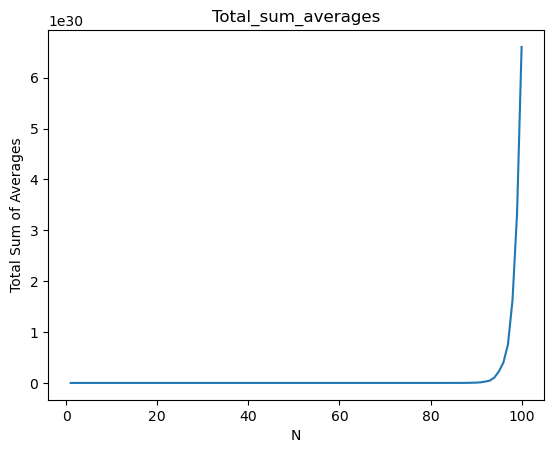

In [8]:
#4.Dynamic programming
#4.1
import random
import matplotlib.pyplot as plt
def Random_integer(N):
    return [random.randint(0, 10) for _ in range(N)]
#4.2
def Sum_averages_optimized(arr):
    n = len(arr)
    if n == 0:
        return 0
    sum_arr = sum(arr)  # 数组元素总和
    # 所有子集平均值之和= 元素总和 × 非空子集数 / 元素个数
    return sum_arr * (2**n - 1) / n
#4.3
# 生成结果
Total_sum_averages = []
for N in range(1, 101):
    arr = Random_integer(N)
    total = Sum_averages_optimized(arr)
    Total_sum_averages.append(total)
# 绘图
plt.plot(range(1, 101), Total_sum_averages)
plt.xlabel('N')
plt.ylabel('Total Sum of Averages')
plt.title('Total_sum_averages')
plt.show()

In [13]:
import random
import numpy as np 
# 5.1 创建矩阵
def create_matrix(N, M):
    matrix = np.zeros((N, M), dtype=int)
    matrix[0, 0] = 1 
    matrix[N-1, M-1] = 1
    # 其余位置随机填充0或1
    for i in range(N):
        for j in range(M):
            if (i, j) not in [(0, 0), (N-1, M-1)]:
                matrix[i, j] = random.randint(0, 1)
    return matrix
# 5.2 递归法计算路径数
def Count_path(matrix, N, M):
    # 函数w：从(i,j)到终点的路径数
    def w(i, j):
        # 越界或遇到障碍物，路径无效
        if i >= N or j >= M or matrix[i][j] == 0:
            return 0
        # 到达终点，找到1条路径
        if i == N-1 and j == M-1:
            return 1
        # 递归：向右移动 + 向下移动的路径数之和
        return w(i, j+1) + w(i+1, j)  
    # 从起点(0,0)开始递归
    return w(0, 0)
# 5.3 计算1000次的平均值
N, M = 10, 8
total = 0
runs = 1000
for _ in range(runs):
    matrix = create_matrix(N, M)
    total += Count_path(matrix, N, M)
mean = total / runs
print(f"1000次运行路径总数的平均值为：{mean}")

1000次运行路径总数的平均值为：0.34
